# Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from MetabolomicsPaper.GeneralHelperFunctions import *

paper_dir = '/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Cardio/ACS_study/v2'
curr_dir = os.path.join(paper_dir, 'data')
make_dir_if_not_exists(curr_dir)
os.chdir(paper_dir)

In [149]:
updated_metabs1 = pd.read_csv('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/Paper_v4/dataframes/updated_metabs1.csv', index_col=0)

# Numbers

In [2]:
# total number of ACS
acs_full_data = pd.read_csv(os.path.join(curr_dir, 'ACS_full_data.csv'), index_col=0)
# total number of non-ACS
pnp1_full_data = pd.read_csv(os.path.join(curr_dir, 'pnp1_full_data.csv'), index_col=1)

/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# metabolon
pnp_data_metabolon = pd.read_csv(os.path.join(curr_dir, 'pnp_data_metabolon.csv'), index_col=0)
pnp_metabolon = pd.read_csv(os.path.join(curr_dir, 'pnp_data_metabolon.csv'), index_col=0).loc[:, '100000010'].dropna().index
acs_metabolon = pd.read_csv(os.path.join(curr_dir, 'acs_data_metabolon.csv'), index_col=0).loc[:, '100000010'].dropna().index
print ('metabolon:', 'pnp:', len(pnp_metabolon), 'acs:', len(acs_metabolon))

/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (43,3236,3261) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


metabolon: pnp: 474 acs: 156


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (1,10,23,30,40,96,107,110,111,112,131,132,133,134,135,136,137,138,139,140,141,142,143,145,148,149,150,151,152,153,155,157,159,169,170,179,184,3212) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# microbiome
pnp_mb = pnp1_full_data[(pnp1_full_data.Nextera=='True') & (pnp1_full_data.IsGenotek == 0)].dropna(subset=[pnp1_full_data.filter(regex='k__').columns[0]]).index
acs_mb = acs_full_data.dropna(subset=[acs_full_data.filter(regex='k__').columns[0]]).index
print ('microbiome:', 'pnp:', len(pnp_mb), 'acs:', len(acs_mb))

microbiome: pnp: 340 acs: 199


In [5]:
# nightingale
ntg_cols = acs_full_data.columns[-241:-13].tolist()
pnp_ntg = pnp1_full_data.reindex(ntg_cols, axis=1).dropna(how='all').index
acs_ntg = acs_full_data.reindex(ntg_cols, axis=1).dropna(how='all').index
print ('nightingale:', 'pnp:', len(pnp_ntg), 'acs:', len(acs_ntg))

nightingale: pnp: 961 acs: 191


In [6]:
# total
print ('total pnp:', len(set(pnp_metabolon).union(set(pnp_mb)).union(set(pnp_ntg))))
print ('total acs:', len(set(acs_metabolon).union(set(acs_mb)).union(set(acs_ntg))))

total pnp: 970
total acs: 199


In [14]:
pd.Series(list(set(pnp_metabolon).union(set(pnp_mb)).union(set(pnp_ntg))), name='PNP RegIDs').to_csv(os.path.join(curr_dir, 'all_PNP1_RegIDs.csv'))
pd.Series(list(set(acs_metabolon).union(set(acs_mb)).union(set(acs_ntg))), name='ACS RegIDs').to_csv(os.path.join(curr_dir, 'all_ACS_RegIDs.csv'))

## overlaps

In [105]:
# microbiome-metabolon overlap
print ('pnp metabolon-microbiome overlap:', len(set(pnp_metabolon).intersection(set(pnp_mb))))
print ('acs metabolon-microbiome overlap:', len(set(acs_metabolon).intersection(set(acs_mb))))

# nightingale-metabolon overlap
print ('pnp metabolon-nightingle overlap:', len(set(pnp_metabolon).intersection(set(pnp_ntg))))
print ('acs metabolon-nightingle overlap:', len(set(acs_metabolon).intersection(set(acs_ntg))))

# microbiome-nightingale overlap
print ('pnp microbiome-nightingle overlap:', len(set(pnp_mb).intersection(set(pnp_ntg))))
print ('acs microbiome-nightingle overlap:', len(set(acs_mb).intersection(set(acs_ntg))))

pnp metabolon-microbiome overlap: 170
acs metabolon-microbiome overlap: 156
pnp metabolon-nightingle overlap: 471
acs metabolon-nightingle overlap: 153
pnp microbiome-nightingle overlap: 332
acs microbiome-nightingle overlap: 191


## matchings

In [110]:
metabolon_matching = pd.read_csv(os.path.join(paper_dir, 'Matching', 'PNP1-ACS_matching', 'PNP1-ACS_metabolon_age+sex+bmi+DM+smoking_1:1.csv'))
pnp_metabolon_matching = metabolon_matching[metabolon_matching['ACS sample']==0].RegistrationCode
acs_metabolon_matching = metabolon_matching[metabolon_matching['ACS sample']==1].RegistrationCode

microbiome_matching = pd.read_csv(os.path.join(paper_dir, 'Matching', 'PNP1-ACS_matching', 'PNP1-ACS_microbiome_age+sex+bmi+DM+smoking_1:1.csv'))
pnp_microbiome_matching = microbiome_matching[microbiome_matching['ACS sample']==0].RegistrationCode
acs_microbiome_matching = microbiome_matching[microbiome_matching['ACS sample']==1].RegistrationCode

In [112]:
# microbiome-nightingale overlap
print ('pnp matching overlap:', len(set(pnp_metabolon_matching).intersection(set(pnp_microbiome_matching))))
print ('acs matching overlap:', len(set(acs_metabolon_matching).intersection(set(acs_microbiome_matching))))

pnp matching overlap: 22
acs matching overlap: 46


# compare metabolon-nightingale

In [169]:
ntg_cols

['Acetate',
 'Acetoacetate',
 'Ala',
 'Albumin',
 'ApoA1',
 'ApoB',
 'ApoB_by_ApoA1',
 'Cholines',
 'Citrate',
 'Creatinine',
 'DHA',
 'DHA_pct',
 'Esterified_C',
 'Free_C',
 'Gln',
 'Glucose',
 'Gly',
 'GlycA',
 'Glycerol',
 'HDL2_C',
 'HDL3_C',
 'HDL_C',
 'HDL_TG',
 'HDL_size',
 'His',
 'IDL_C',
 'IDL_CE',
 'IDL_CE_pct',
 'IDL_C_pct',
 'IDL_FC',
 'IDL_FC_pct',
 'IDL_L',
 'IDL_P',
 'IDL_PL',
 'IDL_PL_pct',
 'IDL_TG',
 'IDL_TG_pct',
 'Ile',
 'LA',
 'LA_pct',
 'LDL_C',
 'LDL_TG',
 'LDL_size',
 'L_HDL_C',
 'L_HDL_CE',
 'L_HDL_CE_pct',
 'L_HDL_C_pct',
 'L_HDL_FC',
 'L_HDL_FC_pct',
 'L_HDL_L',
 'L_HDL_P',
 'L_HDL_PL',
 'L_HDL_PL_pct',
 'L_HDL_TG',
 'L_HDL_TG_pct',
 'L_LDL_C',
 'L_LDL_CE',
 'L_LDL_CE_pct',
 'L_LDL_C_pct',
 'L_LDL_FC',
 'L_LDL_FC_pct',
 'L_LDL_L',
 'L_LDL_P',
 'L_LDL_PL',
 'L_LDL_PL_pct',
 'L_LDL_TG',
 'L_LDL_TG_pct',
 'L_VLDL_C',
 'L_VLDL_CE',
 'L_VLDL_CE_pct',
 'L_VLDL_C_pct',
 'L_VLDL_FC',
 'L_VLDL_FC_pct',
 'L_VLDL_L',
 'L_VLDL_P',
 'L_VLDL_PL',
 'L_VLDL_PL_pct',
 'L_VLD

In [ ]:
updated_metabs1[updated_metabs1.BIOCHEMICAL.str.contains('valine')]

In [186]:
ntg_to_met = {'Acetoacetate': '1218', 'Ala': '811', 'Citrate': '1124', 'Creatinine': '275', 'Gly': '340', 
              'Glucose': '572', 'Glycerol': '1254', 'Lactate': '482', 'Leu': '397', # , 'His': '355'
              'Pyruvate': '823', 'Tyr': '815', 'Val': '566'}

Acetoacetate


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Ala


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Citrate


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Creatinine


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Gly


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Glucose


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Glycerol
His


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Lactate


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Leu


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Pyruvate


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Tyr


/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


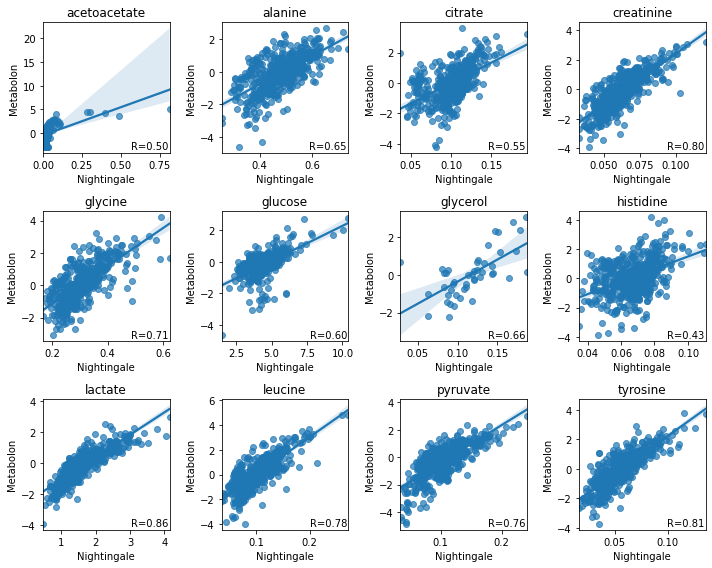

In [200]:
fig, axes = plt.subplots(3, 4, figsize=(10, 8))
for d, ax in zip(ntg_to_met, axes.flatten()):
    print (d)
    k = ntg_to_met[d]
    x, y = pnp_data_metabolon[d].replace('TAG', np.nan).astype(float), pnp_data_metabolon[k].astype(float)
    sns.regplot(x, y, ax=ax, scatter_kws={'alpha':0.7})
    ax.set_xlabel('Nightingale')
    ax.set_ylabel('Metabolon')
    ax.set_title(updated_metabs1.loc[k, 'BIOCHEMICAL'])
    r, p = pearsonr_rmna(x, y)
    add_text_at_corner(ax, 'R=%0.2f'%r, 'bottom right')
    
fig.tight_layout()

plt.savefig(os.path.join(paper_dir, 'Review1', 'metabolon-nightingale_comparison.png'), dpi=200)